<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

В каггл Игорь_Доставалов получил скор: 0.84544


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.isna().sum() #вот собственно и табличка с nan
#но есть пробелы, надо бы и их убрать

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
#data.replace(' ', np.nan, inplace = True)
def check_spaces(some_data):
    bad_indices = []
    for col in num_cols:
        print("column = ", col)
        for i in range(len(some_data[col])):
            if some_data[col][i] == ' ':
                bad_indices.append(i)
                print(i)

    print()
    for cat_col in cat_cols:
        print("cat column = ", cat_col)
        print((some_data[cat_col] == ' ').sum())
        for i in range(len(some_data[cat_col])):
            if some_data[cat_col][i] == ' ':
                bad_indices.append(i)
                print(i)
    return list(set(bad_indices))

In [ ]:
data.drop(check_spaces(data), inplace=True)

column =  ClientPeriod
column =  MonthlySpending
column =  TotalSpent
1048
1707
2543
3078
3697
4002
4326
4551
4598

cat column =  Sex
0
cat column =  IsSeniorCitizen
0
cat column =  HasPartner
0
cat column =  HasChild
0
cat column =  HasPhoneService
0
cat column =  HasMultiplePhoneNumbers
0
cat column =  HasInternetService
0
cat column =  HasOnlineSecurityService
0
cat column =  HasOnlineBackup
0
cat column =  HasDeviceProtection
0
cat column =  HasTechSupportAccess
0
cat column =  HasOnlineTV
0
cat column =  HasMovieSubscription
0
cat column =  HasContractPhone
0
cat column =  IsBillingPaperless
0
cat column =  PaymentMethod
0


In [ ]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

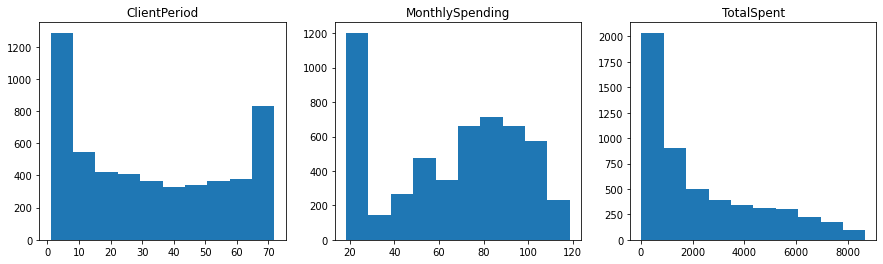

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (15,4))
for  i, col in enumerate(num_cols):
    axs[i].hist(data[col])
    axs[i].title.set_text(col)

In [ ]:
for col in cat_cols:
    print(data[col].value_counts(), '\n\n')

Male      2651
Female    2622
Name: Sex, dtype: int64 


0    4431
1     842
Name: IsSeniorCitizen, dtype: int64 


No     2704
Yes    2569
Name: HasPartner, dtype: int64 


No     3676
Yes    1597
Name: HasChild, dtype: int64 


Yes    4754
No      519
Name: HasPhoneService, dtype: int64 


No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64 


Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64 


No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int64 


No                     2331
Yes                    1805
No internet service    1137
Name: HasOnlineBackup, dtype: int64 


No                     2316
Yes                    1820
No internet service    1137
Name: HasDeviceProtection, dtype: int64 


No                     2603
Yes                    1533
No internet service    1137
Name: HasTechSupp

Как мы видим, если придерживаться определению несбалансированного класса (в 20 раз больше), то в данной выборке все классы более или менее сбалансированы


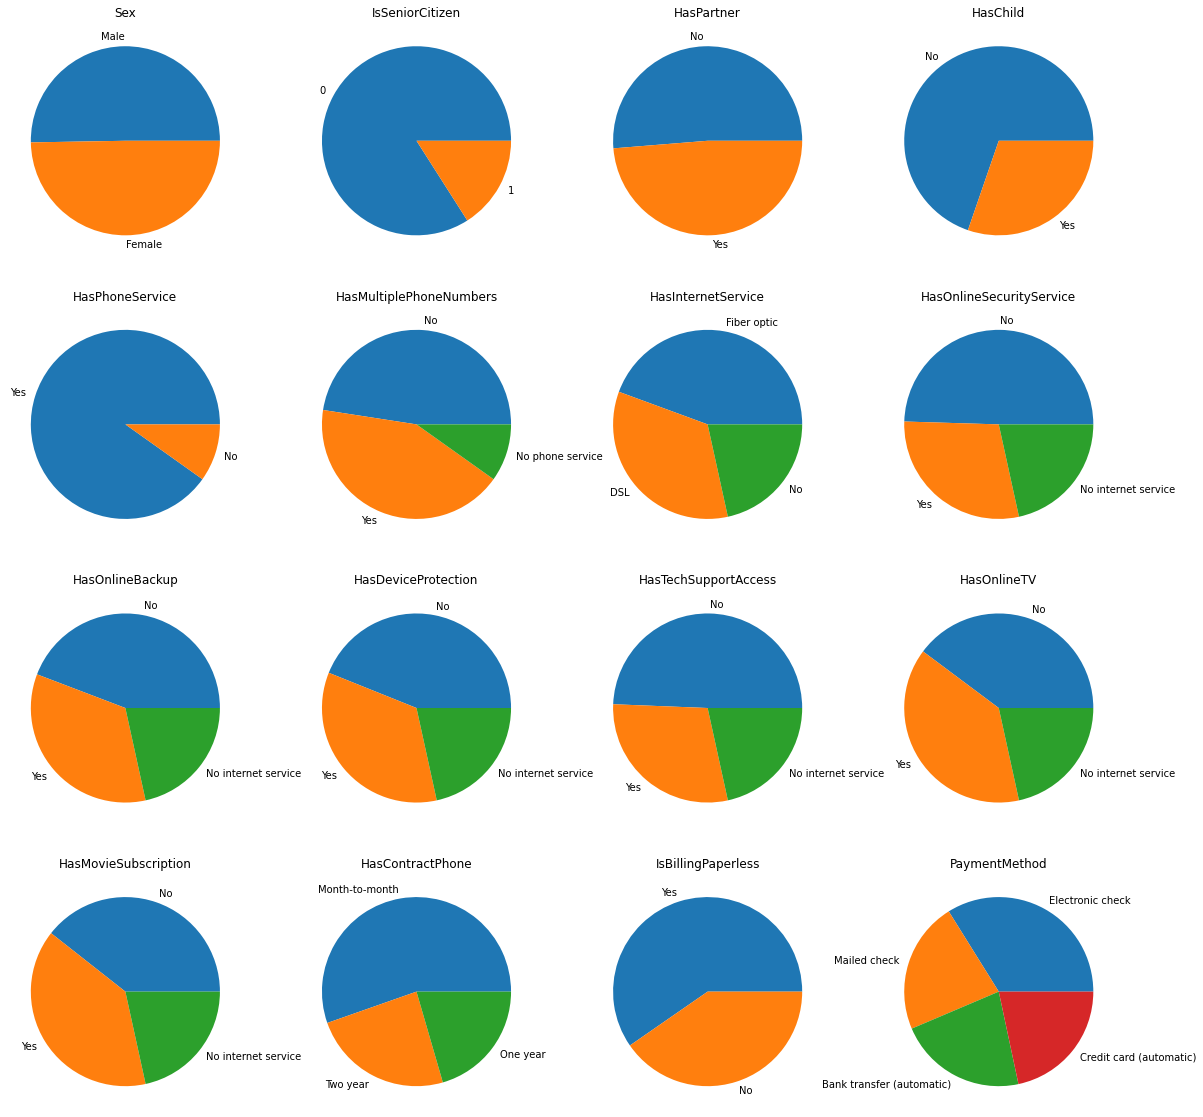

In [ ]:
nums = ((0,0),(0,1),(0,2),(0,3),(1,0),(1,1),(1,2),(1,3),(2,0),(2,1),(2,2),(2,3),(3,0),(3,1),(3,2),(3,3))
fig, axs = plt.subplots(4,4, figsize = (20,20))
for  (i, j), col in zip(nums, cat_cols):
    axs[i,j].pie(data[col].value_counts(), labels = data[col].value_counts().keys())
    axs[i,j].title.set_text(col)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
dummy_cats = pd.get_dummies(data[cat_cols])
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
norm_data = pd.concat([data[num_cols],dummy_cats,data[target_col]],axis = 1)
norm_data.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0.919099,-1.506436,-0.557582,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
1,1.612060,-1.295997,-0.184763,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0
2,-1.282072,0.362658,-0.976504,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1
3,-0.018437,0.475334,0.122800,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,1.122911,1.666716,1.968909,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0


In [ ]:
norm_train_data = norm_data.drop(columns=target_col)
norm_train_y = norm_data[target_col]
X_train, X_val, y_train, y_val = train_test_split(norm_train_data, 
                                                    norm_train_y,
                                                    test_size = 0.2, random_state = 42)

In [ ]:
#model = LogisticRegressionCV(scoring='roc_auc')
model = LogisticRegression(C=1)
model.fit(X_train, y_train)
predictions = model.predict_proba(X_val)[:,1]
roc_auc_score(y_val, predictions)

0.8443312101910828

In [ ]:
parameters = {
    'C': [100,10,1,0.1,0.01,0.001]
}
cv_model = GridSearchCV(estimator=model,param_grid=parameters, scoring='roc_auc', 
                        cv = 5, n_jobs=-1, verbose =10)
cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1937s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=10)

In [ ]:
roc_auc_score(y_val, cv_model.best_estimator_.predict_proba(X_val)[:,1])

0.8439773531493278

In [ ]:
cv_model.best_params_

{'C': 10}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost

     |████████████████████████████████| 65.7MB 58kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(data[num_cols + cat_cols], 
                                                    data[target_col],
                                                    test_size = 0.2, random_state = 42)

In [ ]:
clf = CatBoostClassifier(iterations = 1000, learning_rate= 0.01)
clf.fit(X_train_c, y_train_c, cat_features = cat_cols, eval_set = (X_val_c, y_val_c), verbose = 10)

0:	learn: 0.6862712	test: 0.6861423	best: 0.6861423 (0)	total: 68.1ms	remaining: 1m 8s
10:	learn: 0.6283213	test: 0.6268324	best: 0.6268324 (10)	total: 198ms	remaining: 17.8s
20:	learn: 0.5831936	test: 0.5809042	best: 0.5809042 (20)	total: 327ms	remaining: 15.2s
30:	learn: 0.5495687	test: 0.5469598	best: 0.5469598 (30)	total: 451ms	remaining: 14.1s
40:	learn: 0.5222876	test: 0.5201108	best: 0.5201108 (40)	total: 587ms	remaining: 13.7s
50:	learn: 0.5004006	test: 0.4985166	best: 0.4985166 (50)	total: 708ms	remaining: 13.2s
60:	learn: 0.4839714	test: 0.4824682	best: 0.4824682 (60)	total: 835ms	remaining: 12.9s
70:	learn: 0.4708091	test: 0.4698753	best: 0.4698753 (70)	total: 982ms	remaining: 12.8s
80:	learn: 0.4595200	test: 0.4598614	best: 0.4598614 (80)	total: 1.13s	remaining: 12.8s
90:	learn: 0.4506653	test: 0.4518910	best: 0.4518910 (90)	total: 1.26s	remaining: 12.6s
100:	learn: 0.4431932	test: 0.4453046	best: 0.4453046 (100)	total: 1.4s	remaining: 12.5s
110:	learn: 0.4373674	test: 0.44

In [ ]:
predictions = clf.predict_proba(X_val_c)[:,1]
roc_auc_score(y_val_c, predictions)

0.8415734843123378

In [ ]:
X_test = pd.read_csv('./test.csv')

In [ ]:
X_test.isna().sum()
print(X_test.shape)

(1761, 19)


In [ ]:
indices = check_spaces(X_test)
print(indices)

column =  ClientPeriod
column =  MonthlySpending
column =  TotalSpent
177
767

cat column =  Sex
0
cat column =  IsSeniorCitizen
0
cat column =  HasPartner
0
cat column =  HasChild
0
cat column =  HasPhoneService
0
cat column =  HasMultiplePhoneNumbers
0
cat column =  HasInternetService
0
cat column =  HasOnlineSecurityService
0
cat column =  HasOnlineBackup
0
cat column =  HasDeviceProtection
0
cat column =  HasTechSupportAccess
0
cat column =  HasOnlineTV
0
cat column =  HasMovieSubscription
0
cat column =  HasContractPhone
0
cat column =  IsBillingPaperless
0
cat column =  PaymentMethod
0
[177, 767]


In [ ]:
X_test['TotalSpent'][indices] = '0'
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
coef = 0
for i in range(len(X_test)):
    if i == 177 or i == 767:
        continue
    coef += X_test['TotalSpent'][i] / X_test['MonthlySpending'][i]
coef /= len(X_test)-2
print(coef)

32.34802653182898


In [ ]:
X_test['TotalSpent'][177] = X_test['MonthlySpending'][177] * coef
X_test['TotalSpent'][767] = X_test['MonthlySpending'][767] * coef

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_test['TotalSpent'][767]

655.0475372695369

In [ ]:
dummy_cats_test = pd.get_dummies(X_test[cat_cols])

In [ ]:
scaler = StandardScaler()
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
test_norm_data = pd.concat([X_test[num_cols],dummy_cats_test],axis = 1)
test_norm_data.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.394782,-0.274027,0.057378,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0
1,-0.133958,1.147644,0.330613,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
2,-0.947404,0.401602,-0.695976,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,1.411590,0.326160,1.155783,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0
4,1.574279,-1.481107,-0.384033,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
best_model = cv_model.best_estimator_

In [ ]:
submission = pd.read_csv('./submission.csv')
print(submission.columns)
submission['Churn'] = best_model.predict_proba(test_norm_data)[:,1]
print(submission.columns)
submission.to_csv('./my_submission.csv', index = False)

Index(['Id', 'Churn'], dtype='object')
Index(['Id', 'Churn'], dtype='object')


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.